# Groupe5 - Apprentissage Artificiel

### FORDJOU KAMGANG Landry                            19M2366
### PANDJI TCHOUAKOUE Frank Manuel               19M2110
### AZESSIE NOGHIEWO Léonce                             19M2617
### EYENGA MINKONDA Laurentine Serena           19M2455

### TPE sur kmeans

In [9]:
import numpy as np
from scipy.spatial.distance import cdist 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


 
#cette fonction d'implementation des les etapes de kmeans 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #le choix aleatoire des k centres 
    centroids = x[idx, :] #Step 1
     
    #trouver la distance entre les centres et tout les autres points 
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid avec la distance minimale
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeter les etapes ci-dessus pour un nombre definie d'iteration
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #mise a jour des centroide en utilisant la moyenne des clustres
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 


# cette fonction renvoie un tableau d'etiquettes de cluster pour chaque point de donnees de notre ens d'apprentissage

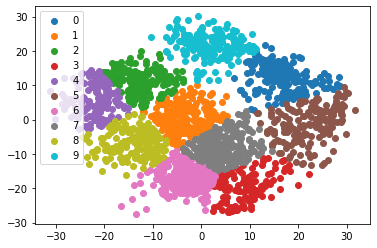

In [10]:

#Definition de la fonction
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #choix aleatoire des centres 
    centroids = x[idx, :] #Step 1
     
    #trouver la distance entre les centre et les autres points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeter ce qui precede pour un nombre defini d'iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #mise a jour des centroides en utilisant la moyenne des clusters
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 
 
#Load Data
data = load_digits().data
pca = PCA(2)
  
#Transformation des donne
df = pca.fit_transform(data)
 
#Appel de la fonction kmeans
label = kmeans(df,10,1000)
 
#Visualisation des resultats
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()